In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<a id='load data'></a>
### LOAD DATA

In [2]:
df=pd.read_csv('Automobile_data (1).csv')

<a id='wrangling'></a>
### Data Wrangling

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [4]:
df.columns=df.columns.map(lambda x:x.replace('-','_'))
df.head(5)

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [5]:
df1=df.iloc[:5,:13]

In [6]:
df2=df.iloc[:5,13:]

In [7]:
df.duplicated().sum()

0

In [8]:
df.iloc[:5,13:].columns.values

array(['curb_weight', 'engine_type', 'num_of_cylinders', 'engine_size',
       'fuel_system', 'bore', 'stroke', 'compression_ratio', 'horsepower',
       'peak_rpm', 'city_mpg', 'highway_mpg', 'price'], dtype=object)

In [9]:
df.iloc[:5,:13].columns.values

array(['symboling', 'normalized_losses', 'make', 'fuel_type',
       'aspiration', 'num_of_doors', 'body_style', 'drive_wheels',
       'engine_location', 'wheel_base', 'length', 'width', 'height'],
      dtype=object)

In [10]:
coulman=['engine_type', 'num_of_cylinders',
       'fuel_system','make','fuel_type','num_of_doors','body_style','drive_wheels','engine_location']

In [11]:
for i in coulman:
    print(i,' : ',df[i].unique())

engine_type  :  ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
num_of_cylinders  :  ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
fuel_system  :  ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']
make  :  ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
fuel_type  :  ['gas' 'diesel']
num_of_doors  :  ['two' 'four' '?']
body_style  :  ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drive_wheels  :  ['rwd' 'fwd' '4wd']
engine_location  :  ['front' 'rear']


In [12]:
df1

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3


In [13]:
df1.symboling.unique()

array([3, 1, 2], dtype=int64)

In [14]:
df.num_of_doors.value_counts()

four    114
two      89
?         2
Name: num_of_doors, dtype: int64

### Data Cleaning

In [15]:
df.loc[df['num_of_doors']=='?','num_of_doors']='four'

In [16]:
df.num_of_doors.value_counts()

four    116
two      89
Name: num_of_doors, dtype: int64

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          5 non-null      int64  
 1   normalized_losses  5 non-null      object 
 2   make               5 non-null      object 
 3   fuel_type          5 non-null      object 
 4   aspiration         5 non-null      object 
 5   num_of_doors       5 non-null      object 
 6   body_style         5 non-null      object 
 7   drive_wheels       5 non-null      object 
 8   engine_location    5 non-null      object 
 9   wheel_base         5 non-null      float64
 10  length             5 non-null      float64
 11  width              5 non-null      float64
 12  height             5 non-null      float64
dtypes: float64(4), int64(1), object(8)
memory usage: 648.0+ bytes


In [18]:
df2

,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   curb_weight        5 non-null      int64  
 1   engine_type        5 non-null      object 
 2   num_of_cylinders   5 non-null      object 
 3   engine_size        5 non-null      int64  
 4   fuel_system        5 non-null      object 
 5   bore               5 non-null      object 
 6   stroke             5 non-null      object 
 7   compression_ratio  5 non-null      float64
 8   horsepower         5 non-null      object 
 9   peak_rpm           5 non-null      object 
 10  city_mpg           5 non-null      int64  
 11  highway_mpg        5 non-null      int64  
 12  price              5 non-null      object 
dtypes: float64(1), int64(4), object(8)
memory usage: 648.0+ bytes


In [20]:
df['bore']=pd.to_numeric(df['bore'],errors='coerce')
df['stroke']=pd.to_numeric(df['stroke'],errors='coerce')
df['horsepower']=pd.to_numeric(df['horsepower'],errors='coerce')
df['peak_rpm']=pd.to_numeric(df['peak_rpm'],errors='coerce')
df['price']=pd.to_numeric(df['price'],errors='coerce')
df['normalized_losses']=pd.to_numeric(df['normalized_losses'],errors='coerce')

In [21]:
df.normalized_losses.unique()

array([ nan, 164., 158., 192., 188., 121.,  98.,  81., 118., 148., 110.,
       145., 137., 101.,  78., 106.,  85., 107., 104., 113., 150., 129.,
       115.,  93., 142., 161., 153., 125., 128., 122., 103., 168., 108.,
       194., 231., 119., 154.,  74., 186.,  83., 102.,  89.,  87.,  77.,
        91., 134.,  65., 197.,  90.,  94., 256.,  95.])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_of_doors       205 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_of_cylinders   205 non-null    object 
 16  engine_size        205 non

### EDA

In [23]:
df.describe()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


We Will explore some relations between coulmns of data

array([[<AxesSubplot:title={'center':'symboling'}>,
        <AxesSubplot:title={'center':'normalized_losses'}>,
        <AxesSubplot:title={'center':'wheel_base'}>,
        <AxesSubplot:title={'center':'length'}>],
       [<AxesSubplot:title={'center':'width'}>,
        <AxesSubplot:title={'center':'height'}>,
        <AxesSubplot:title={'center':'curb_weight'}>,
        <AxesSubplot:title={'center':'engine_size'}>],
       [<AxesSubplot:title={'center':'bore'}>,
        <AxesSubplot:title={'center':'stroke'}>,
        <AxesSubplot:title={'center':'compression_ratio'}>,
        <AxesSubplot:title={'center':'horsepower'}>],
       [<AxesSubplot:title={'center':'peak_rpm'}>,
        <AxesSubplot:title={'center':'city_mpg'}>,
        <AxesSubplot:title={'center':'highway_mpg'}>,
        <AxesSubplot:title={'center':'price'}>]], dtype=object)

<Figure size 2500x2500 with 0 Axes>

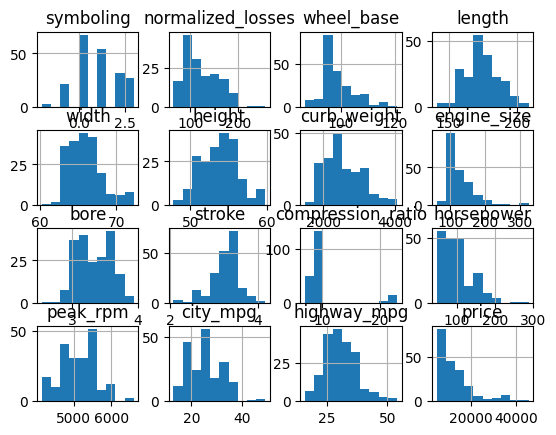

In [24]:
plt.figure(figsize=(25,25))
df.hist()

<AxesSubplot:xlabel='fuel_type', ylabel='price'>

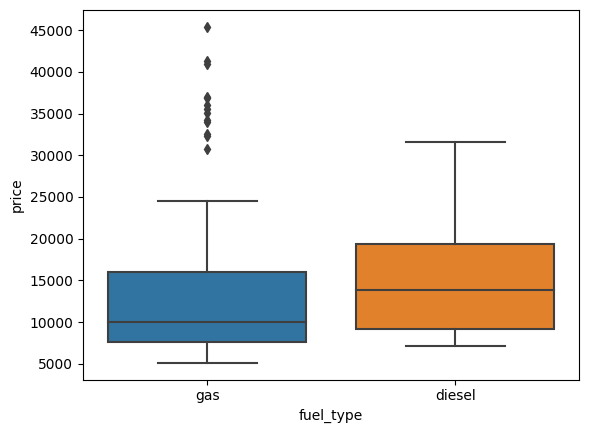

In [25]:
sns.boxplot(x='fuel_type',y='price',data=df)

<AxesSubplot:xlabel='fuel_type', ylabel='count'>

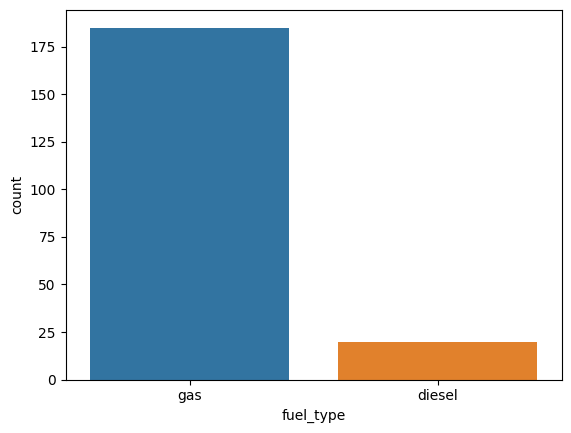

In [26]:
sns.countplot(x=df['fuel_type'])


* I think it's not outlier as thier is many cars are expensive
* the cars that fuel gas more than diesel 

Text(0.5, 1.0, 'count model with type fuel')

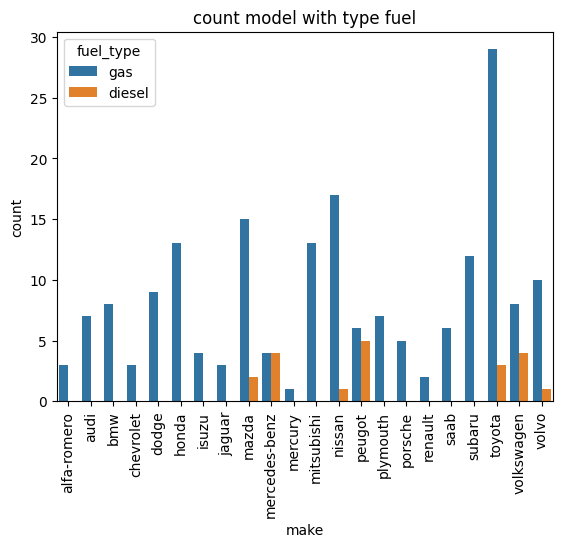

In [27]:

sns.countplot(x=df['make'],hue=df['fuel_type'])
plt.xticks(rotation=90)
plt.title('count model with type fuel')

<AxesSubplot:xlabel='price', ylabel='make'>

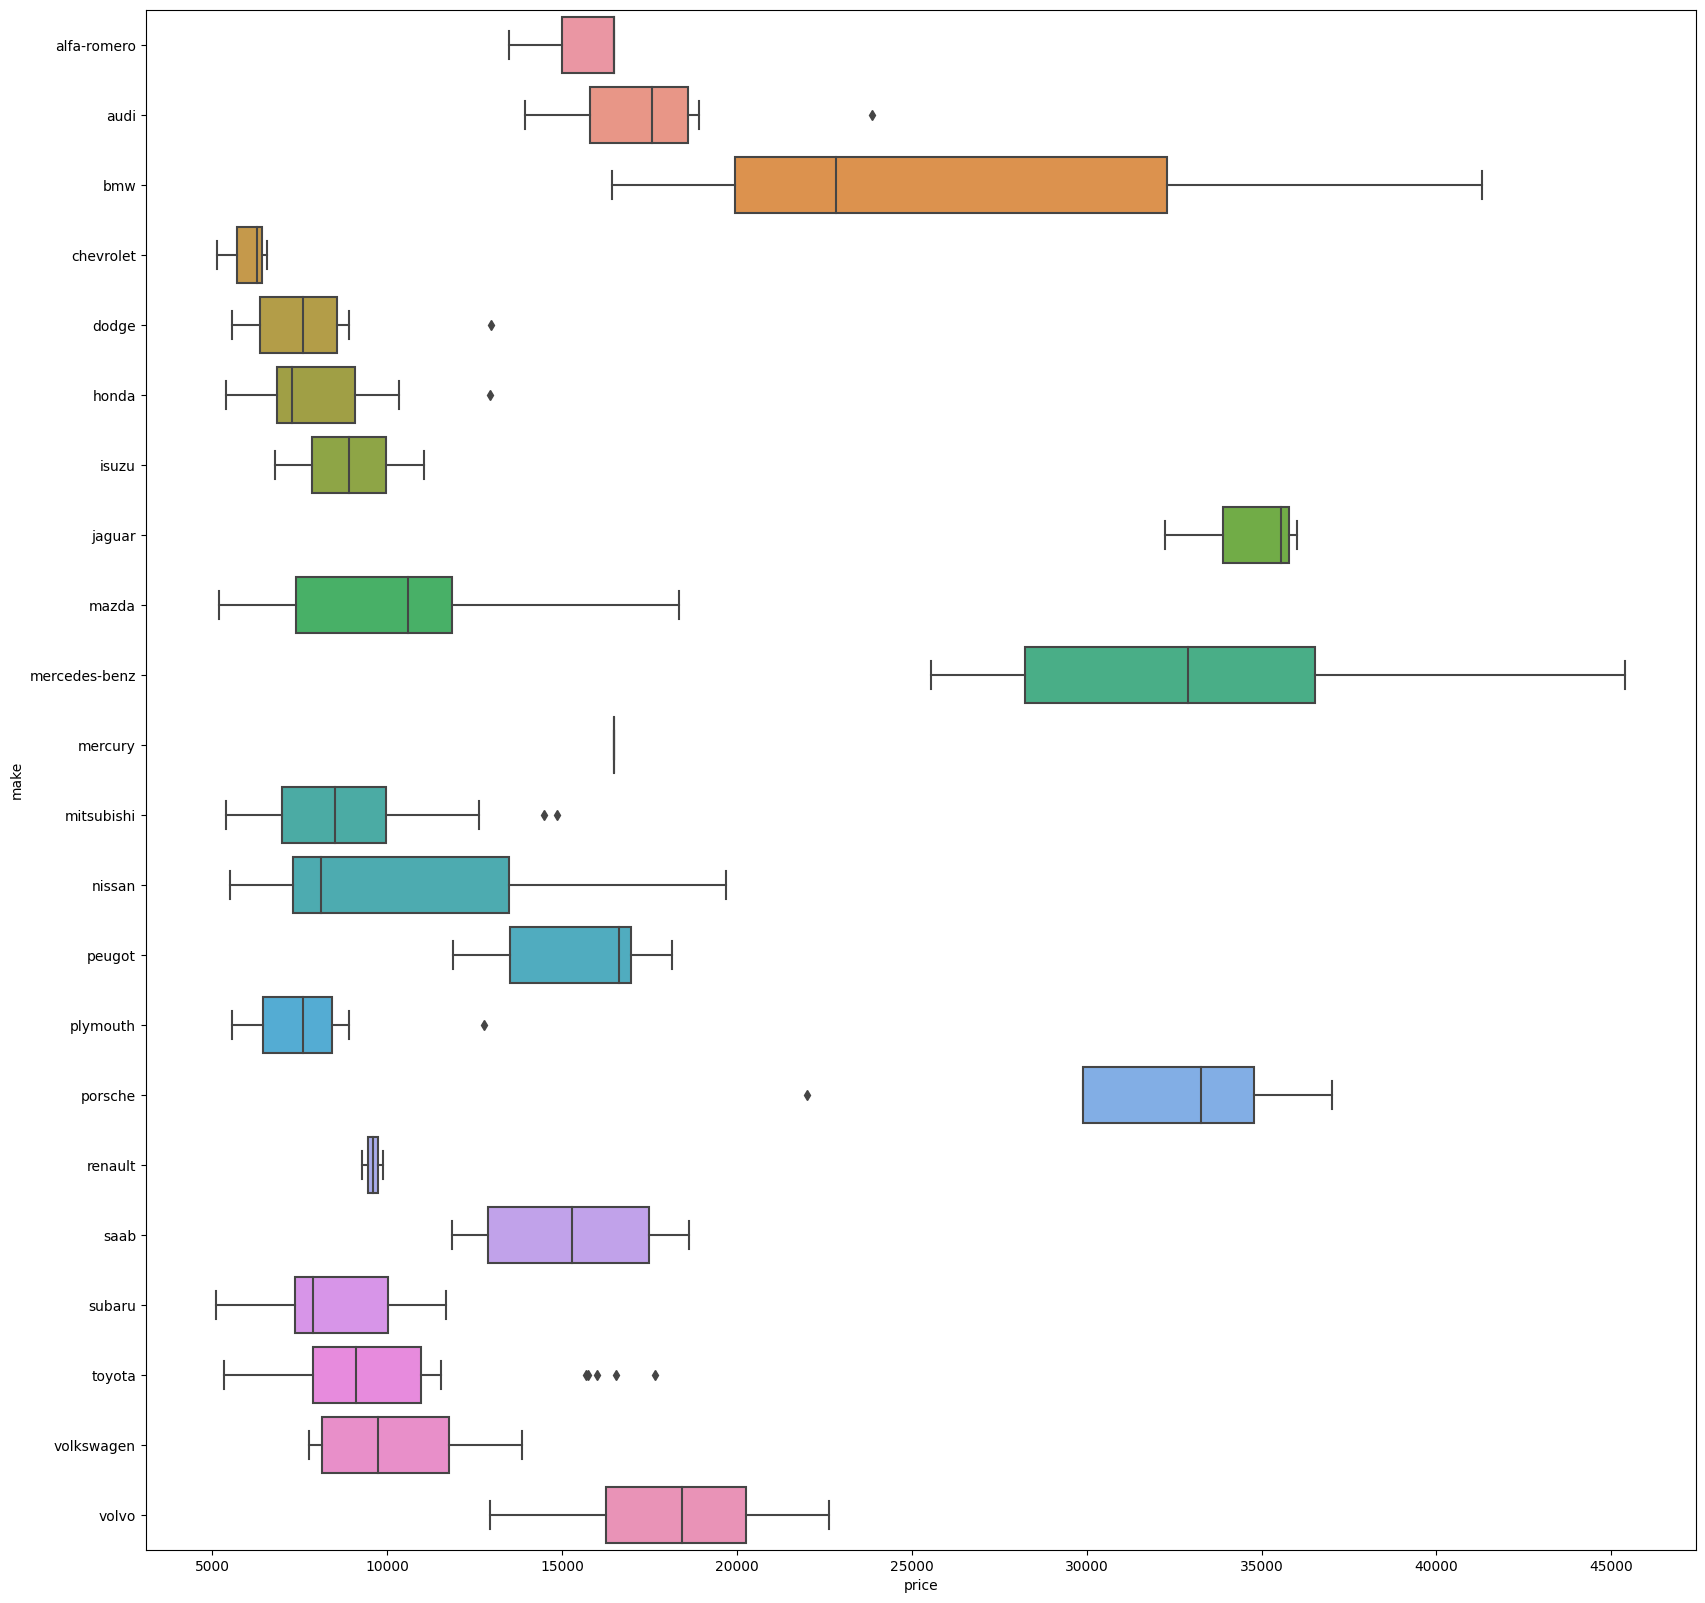

In [28]:
plt.figure(figsize=(20,20))
sns.boxplot(y='make',x='price',data=df)

There are cars expensive but don't depend on fuel type ,as mercedes-benz one of the 5 cars expensive but it fuel diesel

In [29]:
df.groupby('fuel_type')['make'].value_counts()['diesel']

make
peugot           5
mercedes-benz    4
volkswagen       4
toyota           3
mazda            2
nissan           1
volvo            1
Name: make, dtype: int64

<AxesSubplot:xlabel='fuel_system', ylabel='engine_size'>

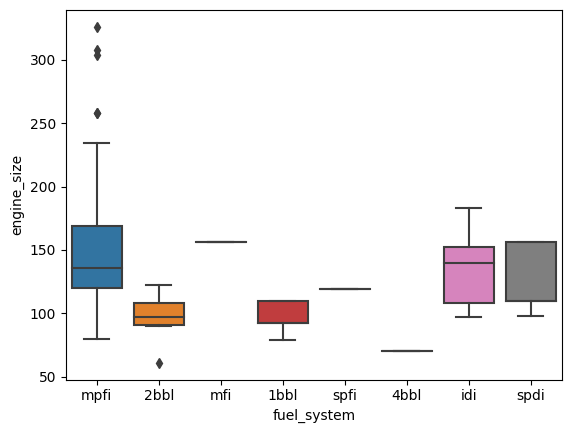

In [30]:
# engine_size
# fuel_system
sns.boxplot(x='fuel_system',y='engine_size',data=df)

<AxesSubplot:xlabel='num_of_doors', ylabel='price'>

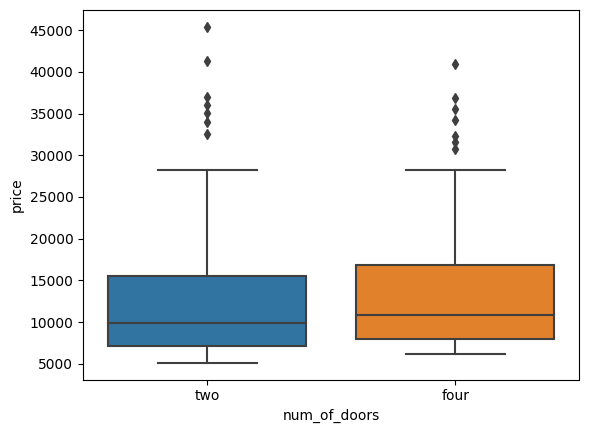

In [31]:
sns.boxplot(data=df,x='num_of_doors',y='price')

In [32]:
df.dtypes

symboling              int64
normalized_losses    float64
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
dtype: object

In [33]:
num_features = ['symboling','normalized_losses','wheel_base','length','width','height','curb_weight','engine_size','bore','stroke','compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg']

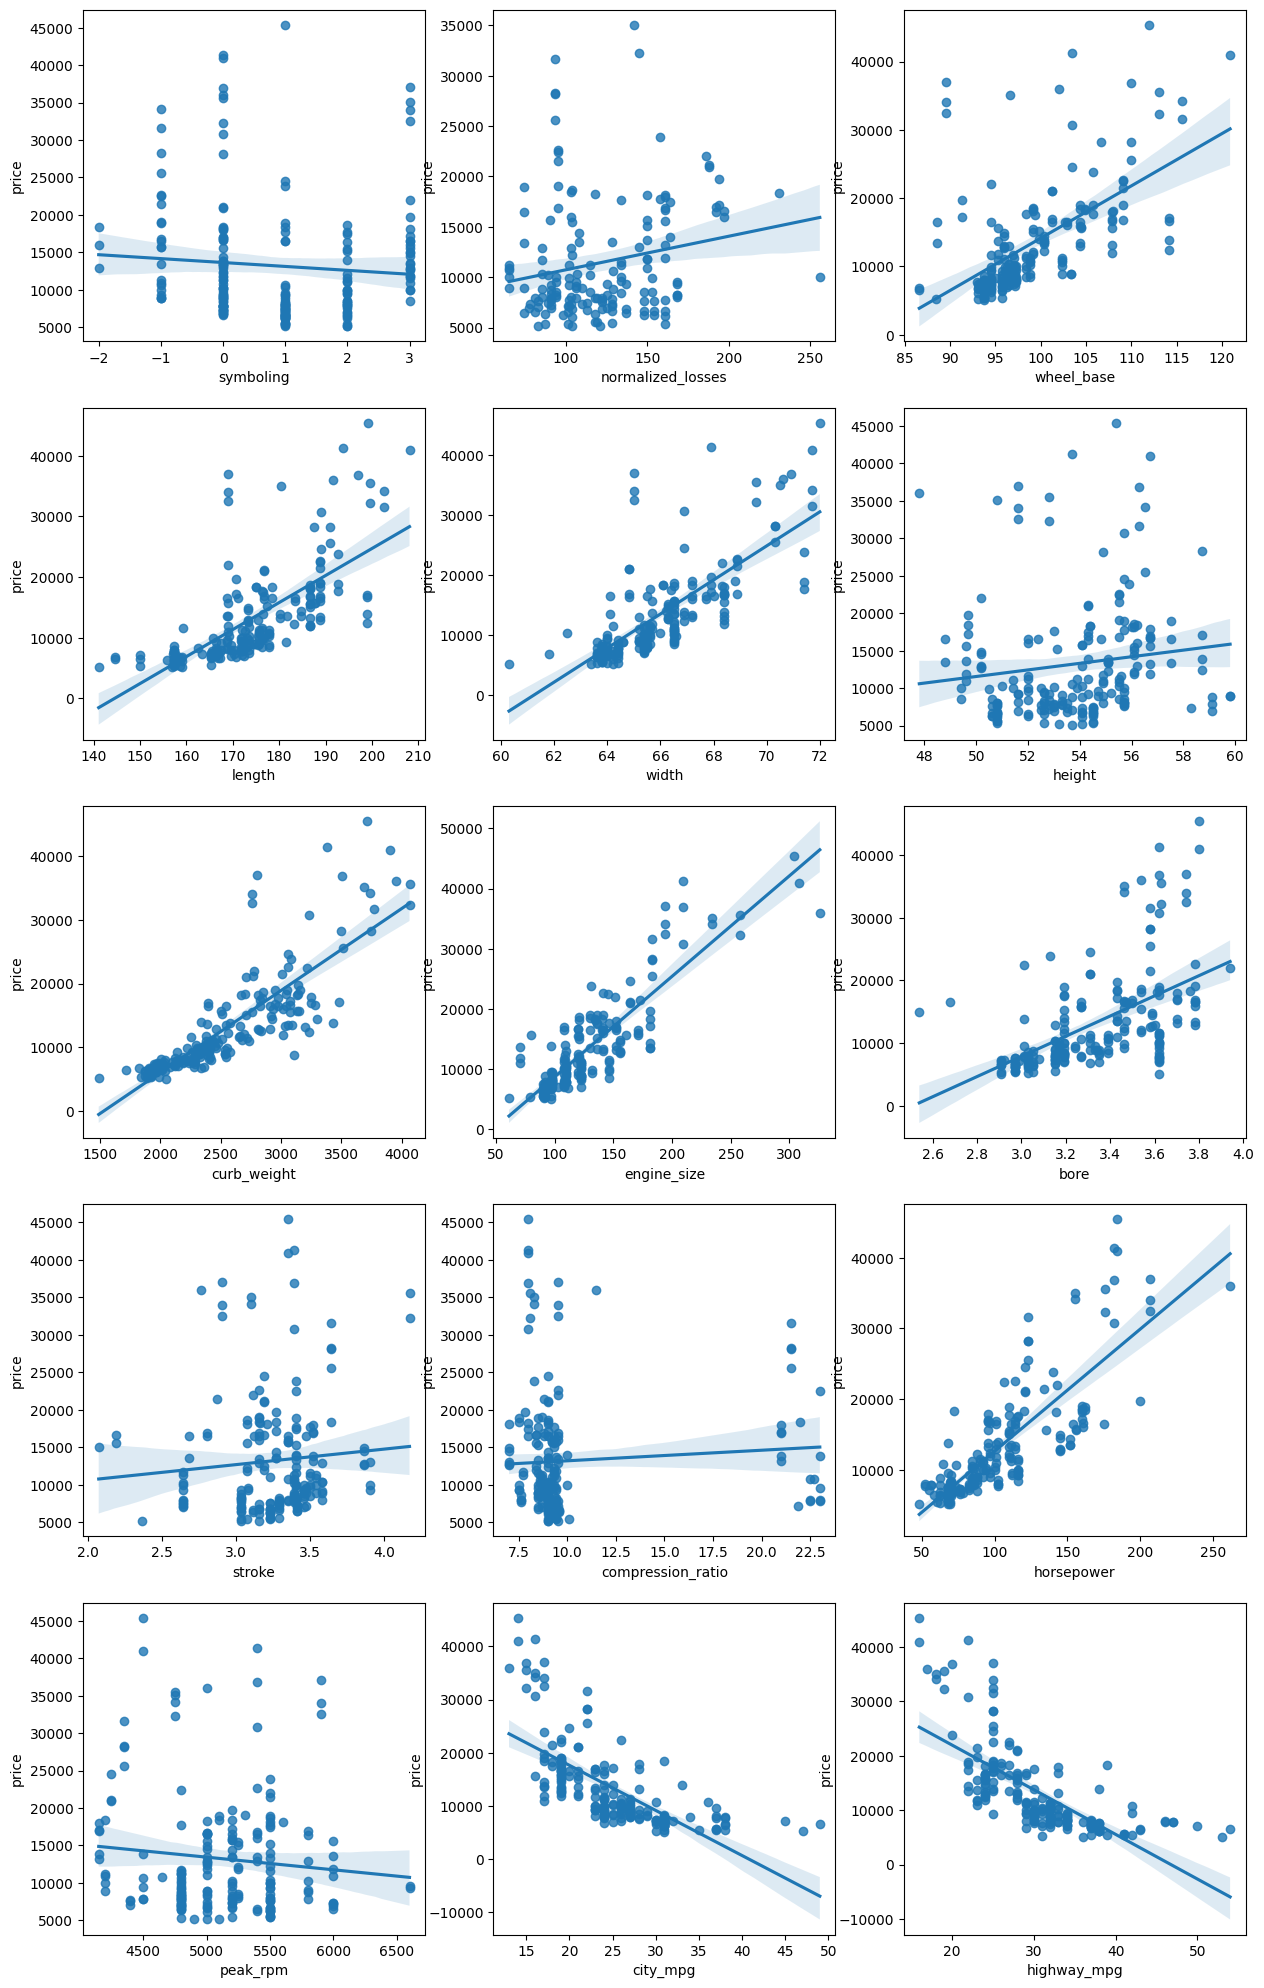

In [34]:
plt.figure(figsize=(15,25))

for i in enumerate (num_features):
    plt.subplot(5,3,i[0]+1)
    sns.regplot(data=df,y='price',x=i[1])


* There are positive relation between price and['wheel_base,engine_size,width,hight,horsepower] and..
* There are nagitive relation between price and[city_mpg,highway_mog]

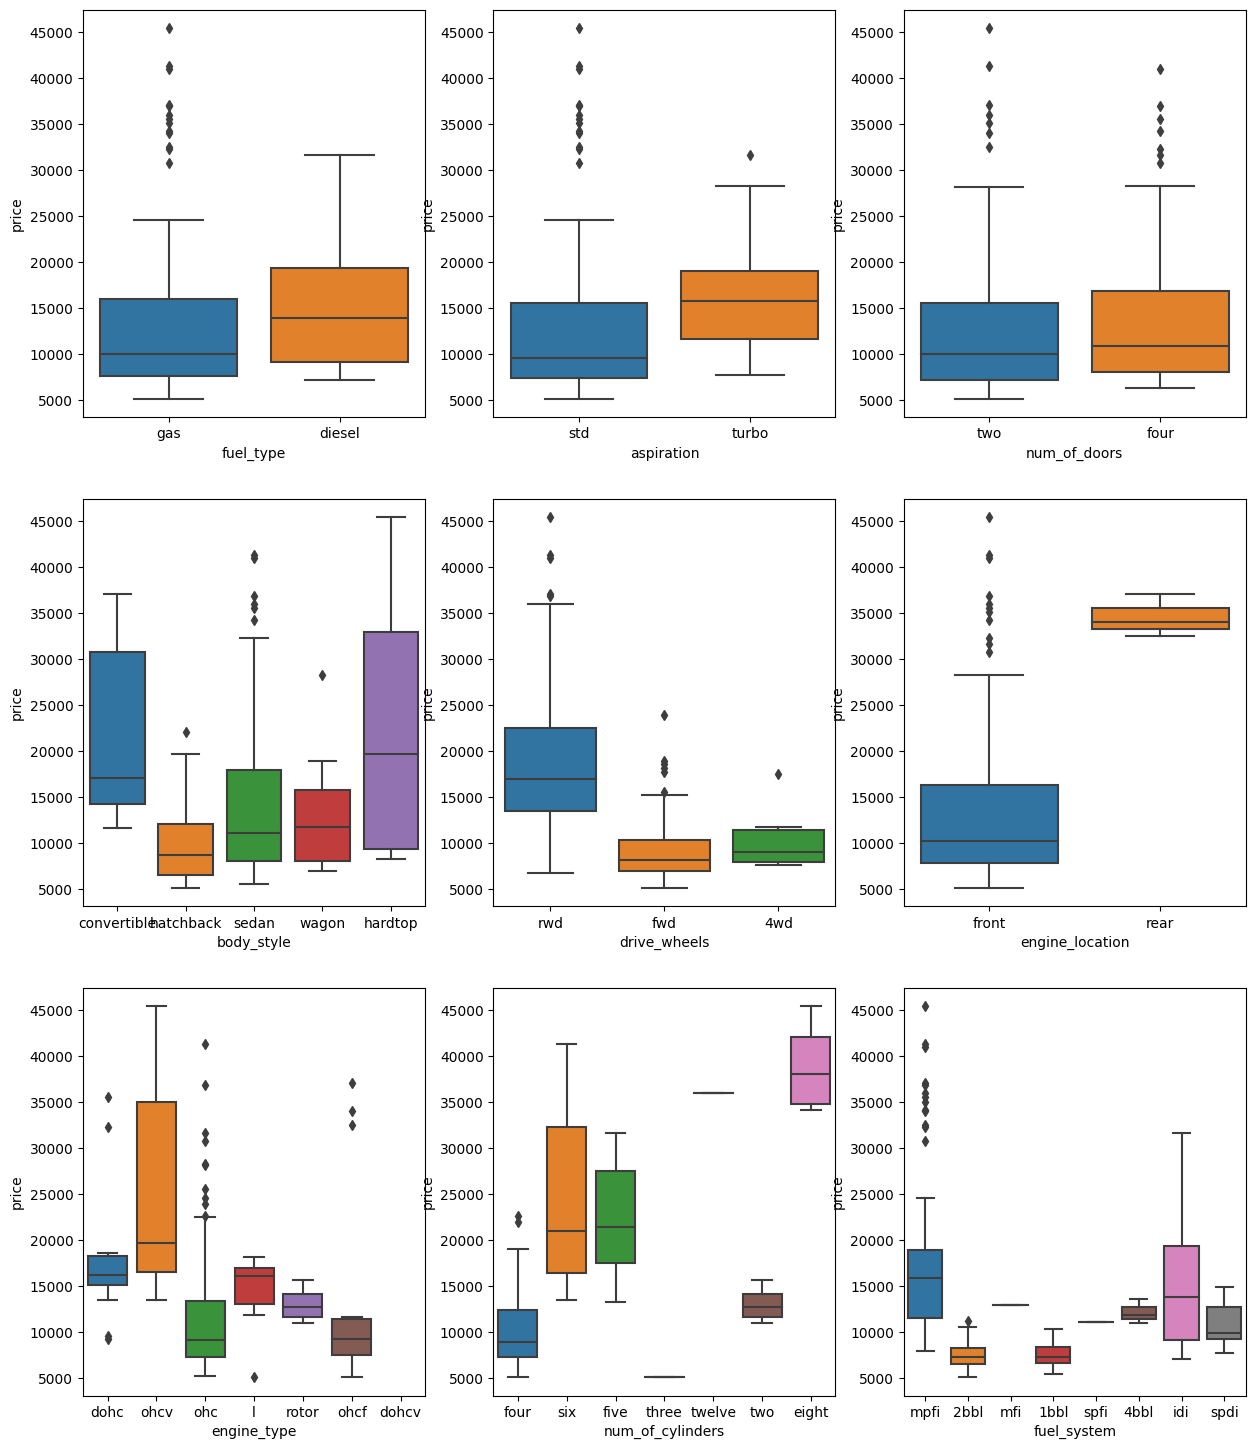

In [35]:
cat_features = ['fuel_type', 'aspiration',
       'num_of_doors', 'body_style', 'drive_wheels', 'engine_location',
        'engine_type','num_of_cylinders', 'fuel_system']
plt.figure(figsize = (15,18))
for i in enumerate (cat_features):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x = i[1],y = 'price',data = df)
     

### Conclusion
* The price is the majer element in this data
* The cars that fuel is disel more than gas
* The toyota is the most common  car compare with price 
* There positive relation between width and hight and lenght in addition  to horsepower and engine size  with price
* When location engine become rear that make price go up


#### Limitation 
* manufacturing country